#MMClassification

In [178]:
# Check nvcc version
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [179]:
# Check GCC version
!gcc --version

gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [180]:
# Check PyTorch installation
import torch, torchvision
print(torch.__version__)
print(torch.cuda.is_available())

1.11.0+cu113
True


In [181]:
# Install mmcv
!pip install mmcv -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.11.0/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.11.0/index.html


In [182]:
# Clone mmcls repository
!git clone https://github.com/open-mmlab/mmclassification.git
%cd mmclassification/

# Install MMClassification from source
!pip install -e . 

Cloning into 'mmclassification'...
remote: Enumerating objects: 6812, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (156/156), done.
remote: Total 6812 (delta 39), reused 127 (delta 27), pack-reused 6626
Receiving objects: 100% (6812/6812), 9.58 MiB | 22.40 MiB/s, done.
Resolving deltas: 100% (4457/4457), done.
/content/mmclassification/mmclassification
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmclassification/mmclassification
  Attempting uninstall: mmcls
    Found existing installation: mmcls 0.23.1
    Can't uninstall 'mmcls'. No files were found to uninstall.
  Running setup.py develop for mmcls


In [183]:
# Check MMClassification installation
import mmcls
print(mmcls.__version__)

0.23.1


In [184]:
# Get the demo image
!wget https://www.dropbox.com/s/k5fsqi6qha09l1v/banana.png?dl=0 -O demo/banana.png

--2022-07-08 09:07:34--  https://www.dropbox.com/s/k5fsqi6qha09l1v/banana.png?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/k5fsqi6qha09l1v/banana.png [following]
--2022-07-08 09:07:35--  https://www.dropbox.com/s/raw/k5fsqi6qha09l1v/banana.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc72a22de0935cd54881b724a74f.dl.dropboxusercontent.com/cd/0/inline/BooXXyjcmLwmoNIcgFRqfLobelC_e4rGSOZnkT2OZaVb9yJFzrItTmfeWS5HKkTZEfJGwBkJ3wcGYAvOU3JBA5RBBrn_vyo123_HeaX3SIcVdkAgqnR0OGlbAZre-VeQPdxfwXKpqn5CyZe8wO4oOeZUfBWUZCYgG_AoUlU4I-ZxiA/file# [following]
--2022-07-08 09:07:36--  https://uc72a22de0935cd54881b724a74f.dl.dropboxusercontent.com/cd/0/inline/BooXXyjcmLwmoNIcgFRqfLobelC_e4rGSOZnkT2OZaVb9yJFzrItTmfeWS5HKkTZEfJ

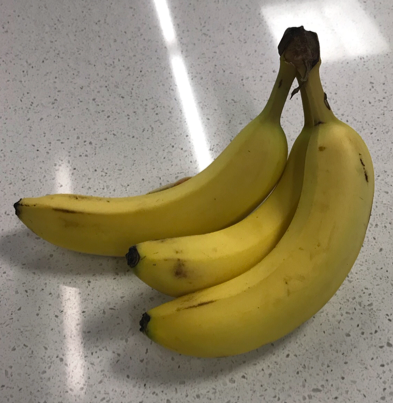

In [185]:
from PIL import Image
Image.open('demo/banana.png')

https://github.com/open-mmlab/mmclassification/blob/master/docs/en/model_zoo.md

In [186]:
# Confirm the config file exists
!ls configs/mobilenet_v2/mobilenet-v2_8xb32_in1k.py

# Specify the path of the config file and checkpoint file.
config_file = 'configs/mobilenet_v2/mobilenet-v2_8xb32_in1k.py'
checkpoint_file = 'https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth'

configs/mobilenet_v2/mobilenet-v2_8xb32_in1k.py


In [187]:
!cat configs/mobilenet_v2/mobilenet-v2_8xb32_in1k.py

_base_ = [
    '../_base_/models/mobilenet_v2_1x.py',
    '../_base_/datasets/imagenet_bs32_pil_resize.py',
    '../_base_/schedules/imagenet_bs256_epochstep.py',
    '../_base_/default_runtime.py'
]


In [188]:
!ls configs/_base_

datasets  default_runtime.py  models  schedules


Полное описание конфига  https://github.com/open-mmlab/mmclassification/blob/master/docs/en/tutorials/config.md

In [189]:
import mmcv
from mmcls.apis import inference_model, init_model, show_result_pyplot

# Specify the device, if you cannot use GPU, you can also use CPU 
# by specifying `device='cpu'`.
device = 'cuda:0'
# device = 'cpu'

# Build the model according to the config file and load the checkpoint.
model = init_model(config_file, checkpoint_file, device=device)

load checkpoint from http path: https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth


/content/mmclassification/mmcls/apis/inference.py:45: UserWarning: Class names are not saved in the checkpoint's meta data, use imagenet by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '


In [190]:
# The inference result in a single image
img = 'demo/banana.png'
img_array =  mmcv.imread(img)
result = inference_model(model, img_array)
result

{'pred_class': 'banana', 'pred_label': 954, 'pred_score': 0.9999284744262695}

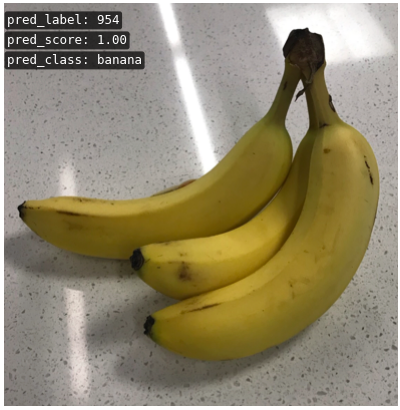

In [191]:
%matplotlib inline
# Visualize the inference result
show_result_pyplot(model, img, result)

In [192]:
# Download the cats & dogs dataset
!wget https://www.dropbox.com/s/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip?dl=0 -O cats_dogs_dataset.zip
!mkdir -p data
!unzip -qo cats_dogs_dataset.zip -d ./data/

--2022-07-08 09:07:38--  https://www.dropbox.com/s/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip [following]
--2022-07-08 09:07:39--  https://www.dropbox.com/s/raw/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf1a1273a122fefb5f1833dbed4.dl.dropboxusercontent.com/cd/0/inline/BooAqdxSu5Cwbt7MF-doPYcMjAlbHgZywmzKNNBWQwZCEUokopP7_3ZKtN7NRKjU9faws3bx6XgFw_ujr3fMm_C1-WylJJAoqOYuXoOpjuyp_JLTXYWHTbBHLMbmdObUoWcRALi2lhvlSMnC0WAagbjJ5yya2_62J_T8EqNipExMwQ/file# [following]
--2022-07-08 09:07:39--  https://ucf1a1273a122fefb5f1833dbed4.dl.dropboxusercontent.com/cd/0/inline/BooAqdxSu5Cwbt7M

In [193]:
# Load the base config file
from mmcv import Config
cfg = Config.fromfile('configs/mobilenet_v2/mobilenet-v2_8xb32_in1k.py')

# Modify the number of classes in the head.
cfg.model.head.num_classes = 2
cfg.model.head.topk = (1, )

# Load the pre-trained model's checkpoint.
cfg.model.backbone.init_cfg = dict(type='Pretrained', checkpoint=checkpoint_file, prefix='backbone')

# Specify sample size and number of workers.
cfg.data.samples_per_gpu = 32
cfg.data.workers_per_gpu = 2

# Specify the path and meta files of training dataset
cfg.data.train.data_prefix = 'data/cats_dogs_dataset/training_set/training_set'
cfg.data.train.classes = 'data/cats_dogs_dataset/classes.txt'

# Specify the path and meta files of validation dataset
cfg.data.val.data_prefix = 'data/cats_dogs_dataset/val_set/val_set'
cfg.data.val.ann_file = 'data/cats_dogs_dataset/val.txt'
cfg.data.val.classes = 'data/cats_dogs_dataset/classes.txt'

# Specify the path and meta files of test dataset
cfg.data.test.data_prefix = 'data/cats_dogs_dataset/test_set/test_set'
cfg.data.test.ann_file = 'data/cats_dogs_dataset/test.txt'
cfg.data.test.classes = 'data/cats_dogs_dataset/classes.txt'

# Specify the normalization parameters in data pipeline
normalize_cfg = dict(type='Normalize', mean=[124.508, 116.050, 106.438], std=[58.577, 57.310, 57.437], to_rgb=True)
cfg.data.train.pipeline[3] = normalize_cfg
cfg.data.val.pipeline[3] = normalize_cfg
cfg.data.test.pipeline[3] = normalize_cfg

# Modify the evaluation metric
cfg.evaluation['metric_options']={'topk': (1, )}

# Specify the optimizer
cfg.optimizer = dict(type='SGD', lr=0.005, momentum=0.9, weight_decay=0.0001)
cfg.optimizer_config = dict(grad_clip=None)

# Specify the learning rate scheduler
cfg.lr_config = dict(policy='step', step=1, gamma=0.1)
cfg.runner = dict(type='EpochBasedRunner', max_epochs=2)

# Specify the work directory
cfg.work_dir = './work_dirs/cats_dogs_dataset'

# Output logs for every 10 iterations
cfg.log_config.interval = 10

# Set the random seed and enable the deterministic option of cuDNN
# to keep the results' reproducible.
from mmcls.apis import set_random_seed
cfg.seed = 0
set_random_seed(0, deterministic=True)

cfg.gpu_ids = range(1)

In [194]:
import time
import mmcv
import os.path as osp

from mmcls.datasets import build_dataset
from mmcls.models import build_classifier
from mmcls.apis import train_model

# Create the work directory
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
# Build the classifier
model = build_classifier(cfg.model)
model.init_weights()
# Build the dataset
datasets = [build_dataset(cfg.data.train)]
# Add `CLASSES` attributes to help visualization
model.CLASSES = datasets[0].CLASSES

2022-07-08 09:07:50,720 - mmcv - INFO - initialize MobileNetV2 with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth', 'prefix': 'backbone'}
2022-07-08 09:07:50,722 - mmcv - INFO - load backbone in model from: https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth
2022-07-08 09:07:50,826 - mmcv - INFO - initialize LinearClsHead with init_cfg {'type': 'Normal', 'layer': 'Linear', 'std': 0.01}
2022-07-08 09:07:50,829 - mmcv - INFO - 
backbone.conv1.conv.weight - torch.Size([32, 3, 3, 3]): 
PretrainedInit: load from https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth 
 
2022-07-08 09:07:50,832 - mmcv - INFO - 
backbone.conv1.bn.weight - torch.Size([32]): 
PretrainedInit: load from https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilen

load checkpoint from http path: https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth


2022-07-08 09:07:50,931 - mmcv - INFO - 
backbone.layer3.0.conv.2.bn.weight - torch.Size([32]): 
PretrainedInit: load from https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth 
 
2022-07-08 09:07:50,934 - mmcv - INFO - 
backbone.layer3.0.conv.2.bn.bias - torch.Size([32]): 
PretrainedInit: load from https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth 
 
2022-07-08 09:07:50,935 - mmcv - INFO - 
backbone.layer3.1.conv.0.conv.weight - torch.Size([192, 32, 1, 1]): 
PretrainedInit: load from https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth 
 
2022-07-08 09:07:50,937 - mmcv - INFO - 
backbone.layer3.1.conv.0.bn.weight - torch.Size([192]): 
PretrainedInit: load from https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth 
 
2022-07-08 09:07

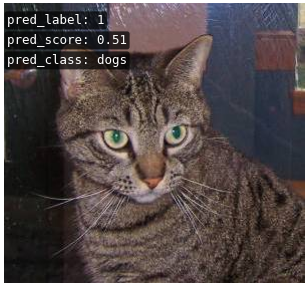

In [195]:
%matplotlib inline
# Validate the fine-tuned model

img = mmcv.imread('data/cats_dogs_dataset/training_set/training_set/cats/cat.1.jpg')

model.cfg = cfg
result = inference_model(model, img)

show_result_pyplot(model, img, result)

In [196]:
#Start fine-tuning
train_model(
    model,
    datasets,
    cfg,
    distributed=False,
    validate=False,
    timestamp=time.strftime('%Y%m%d_%H%M%S', time.localtime()),
    meta=dict())

2022-07-08 09:07:53,050 - mmcls - INFO - Start running, host: root@0d1aa858d27a, work_dir: /content/mmclassification/mmclassification/work_dirs/cats_dogs_dataset
2022-07-08 09:07:53,058 - mmcls - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) CheckpointHook                     
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) StepLrUpdaterHook                  
(LOW         ) IterTimerHook                      
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_iter:
(VERY_HIGH   ) StepLrUpdaterHook                  
(LOW         ) IterTimerHook                      
 -------------------- 
after_train_iter:
(ABOVE_NORMAL) OptimizerHook                      
(NORMAL      ) CheckpointHook                     
(LOW         ) IterTimerHook                      
(VERY_LOW    ) TextLoggerHook                     


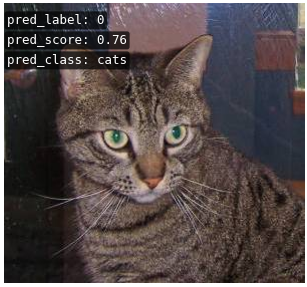

In [197]:
%matplotlib inline
# Validate the fine-tuned model

img = mmcv.imread('data/cats_dogs_dataset/training_set/training_set/cats/cat.1.jpg')

result = inference_model(model, img)

show_result_pyplot(model, img, result)